# Monod demonstration: Noise decompositions 

In [1]:

import numpy as np
import copy

#a e s t h e t i c s

fs = 16
nbin=40

#https://github.com/BlakeRMills/MetBrewer
Degas=("#591d06", "#96410e", "#e5a335", "#556219", "#418979", "#2b614e", "#053c29")
Demuth = ("#591c19", "#9b332b", "#b64f32", "#d39a2d", "#f7c267", "#b9b9b8", "#8b8b99", "#5d6174", "#41485f", "#262d42")



In [2]:
import cme_toolbox
from cme_toolbox import CMEModel
import inference
from inference import InferenceParameters, GradientInference
import analysis 
from analysis import *


In [5]:
# dataset_names = ['heart_10k_v3'] 
dataset_names = ['pbmc_1k_v3','pbmc_10k_v3'] 
# loom_filepaths = ['/home/ggorin/count_data/loom_10x_kb/'+x for x in dataset_names] 
filepaths = ['/home/ggorin/count_data/loom_10x_kb/pbmc_1k_v3.h5ad','/home/ggorin/count_data/loom_10x_kb/pbmc_10k_v3.loom']


transcriptome_filepath = './polyA_ref/gg_200525_genome_polyA_cum_3'
attribute_names=['spliced','unspliced','gene_name','barcode']
spliced_layer,unspliced_layer,gene_attr,cell_attr = attribute_names

INFO:root:Beginning data preprocessing and filtering.
INFO:root:Dataset: pbmc_1k_v3
INFO:root:1200 cells detected.
INFO:root:36601 features observed, 36169 match genome annotations. 35727 were unique.
INFO:root:3089 genes retained after expression filter.
INFO:root:Dataset: pbmc_10k_v3
INFO:root:11756 cells detected.
INFO:root:36601 features observed, 36169 match genome annotations. 35727 were unique.
INFO:root:5830 genes retained after expression filter.
INFO:root:Directory ./fits/gg_220527_021_ANNDATATEST_1/pbmc_10k_v3 created.
INFO:root:Gene set size: 3002
INFO:root:5 genes selected.


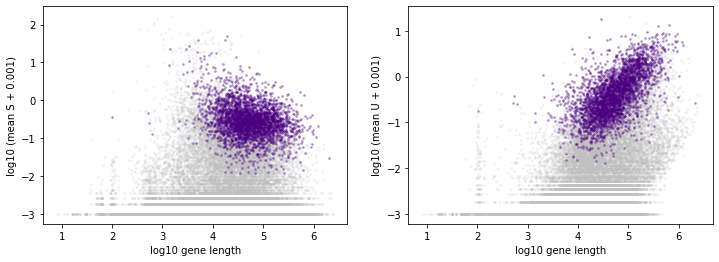

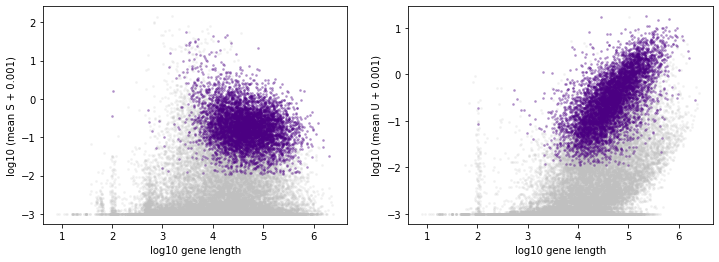

In [6]:
dir_string,dataset_strings = construct_batch(filepaths, \
                                             transcriptome_filepath, \
                                             dataset_names, \
                                             attribute_names=attribute_names,\
                                             batch_location='./fits',meta='ANNDATATEST',batch_id=1,\
                                             n_genes=5)